In [1]:
import matplotlib.pyplot as plt
import cv2
import warnings
warnings.filterwarnings('ignore')
import numpy as np

In [2]:
camel_1_img=cv2.imread('Horses_Camels/train/camel/1.png')

In [3]:
camel_1_img=cv2.cvtColor(camel_1_img,cv2.COLOR_BGR2RGB)

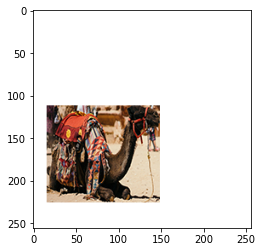

In [4]:
plt.imshow(camel_1_img)

In [5]:
camel_1_img.shape

(256, 256, 3)

In [6]:
horse_1_img=cv2.imread('Horses_Camels/train/horse/1.png')

In [7]:
horse_1_img=cv2.cvtColor(horse_1_img,cv2.COLOR_BGR2RGB)

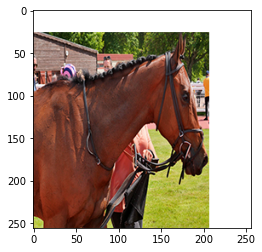

In [8]:
plt.imshow(horse_1_img)

In [9]:
horse_1_img.shape

(256, 256, 3)

In [10]:
from keras.preprocessing.image import ImageDataGenerator

In [11]:
image_generator=ImageDataGenerator(rotation_range=30,width_shift_range=0.1,height_shift_range=0.1,rescale=1/255,shear_range=0.2,
                                   zoom_range=0.20,horizontal_flip=True,fill_mode='nearest')

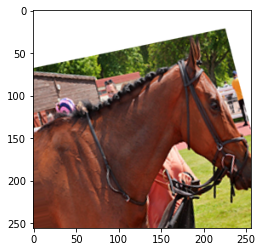

In [12]:
plt.imshow(image_generator.random_transform(horse_1_img))

In [13]:
image_generator.flow_from_directory('Horses_Camels/train')

Found 360 images belonging to 2 classes.


In [14]:
from keras.models import Sequential
from keras.layers import Activation,Dropout,Flatten,Conv2D,MaxPooling2D,Dense

In [15]:
model=Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

In [16]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [18]:
#train the model
input_shape=(150,150,3)

In [19]:
batch_size=32
train_image_generator=image_generator.flow_from_directory('Horses_Camels/train',target_size=input_shape[:2],batch_size=batch_size,
                                                         class_mode='binary')

Found 360 images belonging to 2 classes.


In [20]:
test_image_generator=image_generator.flow_from_directory('Horses_Camels/test',target_size=input_shape[:2],batch_size=batch_size,
                                                         class_mode='binary')

Found 40 images belonging to 2 classes.


In [21]:
train_image_generator.class_indices

{'camel': 0, 'horse': 1}

In [22]:
from keras import callbacks

In [23]:
callbacks = [callbacks.ModelCheckpoint("save_at_{epoch}.h5"),]

In [24]:
results=model.fit(train_image_generator,epochs=25,steps_per_epoch=11,callbacks=callbacks,validation_data=test_image_generator,
                           validation_steps=2)

Epoch 1/25
11/11 [==============================] - 7s 595ms/step - loss: 0.7425 - accuracy: 0.5022 - val_loss: 0.6917 - val_accuracy: 0.5000
Epoch 2/25
11/11 [==============================] - 6s 502ms/step - loss: 0.6927 - accuracy: 0.4883 - val_loss: 0.6672 - val_accuracy: 0.5250
Epoch 3/25
11/11 [==============================] - 6s 586ms/step - loss: 0.6654 - accuracy: 0.5821 - val_loss: 0.5872 - val_accuracy: 0.6250
Epoch 4/25
11/11 [==============================] - 8s 801ms/step - loss: 0.5839 - accuracy: 0.6690 - val_loss: 0.6657 - val_accuracy: 0.6000
Epoch 5/25
11/11 [==============================] - 7s 638ms/step - loss: 0.5860 - accuracy: 0.6906 - val_loss: 0.6013 - val_accuracy: 0.6500
Epoch 6/25
11/11 [==============================] - 7s 650ms/step - loss: 0.5518 - accuracy: 0.7503 - val_loss: 0.6691 - val_accuracy: 0.6750
Epoch 7/25
11/11 [==============================] - 7s 608ms/step - loss: 0.5320 - accuracy: 0.7463 - val_loss: 0.6410 - val_accuracy: 0.7250
Epoch 

In [25]:
model.save('horses_camels_model.h5')

In [43]:
results.history['accuracy']

[0.4908536672592163,
 0.4943181872367859,
 0.6310975551605225,
 0.6951219439506531,
 0.7164633870124817,
 0.7408536672592163,
 0.7378048896789551,
 0.7591463327407837,
 0.7835366129875183,
 0.792682945728302,
 0.75,
 0.7743902206420898,
 0.8109756112098694,
 0.8414633870124817,
 0.7835366129875183,
 0.7560975551605225,
 0.792682945728302,
 0.7774389982223511,
 0.8170731663703918,
 0.8292682766914368,
 0.8048780560493469,
 0.8039772510528564,
 0.8231707215309143,
 0.8475610017776489,
 0.8109756112098694]

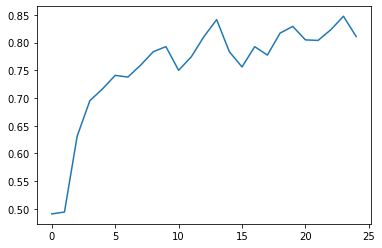

In [27]:
plt.plot(results.history['accuracy'])

In [28]:
predictions = model.predict(x=test_image_generator,batch_size=10,verbose=0)  

In [29]:
for i in predictions:
    print(i)

[0.05800006]
[0.72359914]
[0.39902195]
[0.97844094]
[0.52711964]
[0.2837878]
[0.29278713]
[0.9449885]
[0.9999371]
[0.22912505]
[0.02611694]
[0.48518407]
[0.51095176]
[0.59583396]
[0.9876535]
[0.9814538]
[0.7142141]
[0.8796987]
[0.22522524]
[0.18169767]
[0.9512289]
[0.3096193]
[0.9478123]
[0.01626664]
[0.30241987]
[0.06550846]
[0.26908267]
[0.3603162]
[0.64779633]
[0.9904914]
[0.02534705]
[0.9999894]
[0.99272716]
[0.9432907]
[0.17800051]
[0.9991194]
[0.28991693]
[0.34309852]
[0.17233217]
[0.16222581]


In [31]:
train_image_generator.class_indices

{'camel': 0, 'horse': 1}

In [32]:
import numpy as np
from keras.preprocessing import image

horse_img_10 = 'Horses_Camels/train/horse/10.png'
horse_img = image.load_img(horse_img_10, target_size=(150, 150))
horse_img = image.img_to_array(horse_img)
horse_img = np.expand_dims(horse_img, axis=0)
horse_img = horse_img/255
prediction_prob_horse = model.predict(horse_img)
print(f'Probability that image is a horse is: {prediction_prob_horse}')

Probability that image is a horse is: [[0.9344249]]


In [33]:
camel_img_10 = 'Horses_Camels/train/camel/10.png'
camel_img = image.load_img(camel_img_10, target_size=(150, 150))
camel_img = image.img_to_array(camel_img)
camel_img = np.expand_dims(camel_img, axis=0)
camel_img = camel_img/255
prediction_prob_camel = model.predict(camel_img)
print(f'Probability that image is a camel is: {prediction_prob_camel}')

Probability that image is a camel is: [[0.18123722]]


In [34]:
from sklearn.metrics import classification_report

In [35]:
from sklearn.metrics import confusion_matrix
import itertools

In [36]:
Y_pred = model.predict_generator(test_image_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_image_generator.classes, y_pred))
print('Classification Report')
target_names = ['Horse', 'Camel']
print(classification_report(test_image_generator.classes, y_pred, target_names=target_names))

Confusion Matrix
[[20  0]
 [20  0]]
Classification Report
              precision    recall  f1-score   support

       Horse       0.50      1.00      0.67        20
       Camel       0.00      0.00      0.00        20

    accuracy                           0.50        40
   macro avg       0.25      0.50      0.33        40
weighted avg       0.25      0.50      0.33        40



In [48]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.50      1.00      0.67        20
           1       0.00      0.00      0.00        20

    accuracy                           0.50        40
   macro avg       0.25      0.50      0.33        40
weighted avg       0.25      0.50      0.33        40

Confusion matrix, without normalization
[[20  0]
 [20  0]]


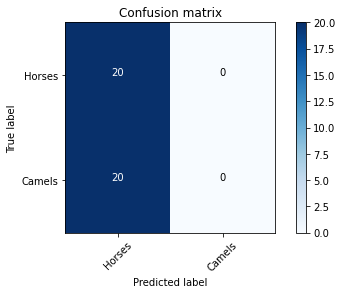

In [49]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(test_image_generator.classes, y_pred)
np.set_printoptions(precision=2)

print (classification_report(test_image_generator.classes, y_pred))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Horses','Camels'],normalize= False,  title='Confusion matrix')

Dataset:https://www.kaggle.com/akrsnv/horses-and-camels